Text(0.5, 1.0, 'Loss by Disaster')

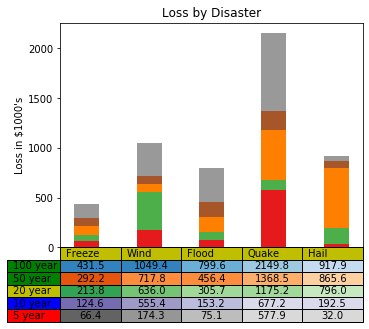

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]
columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]
values = np.arange(0, 2500, 500)
value_increment = 1000
colors = plt.cm.Set1(np.linspace(0, 1, len(rows))) 
#Set1的区间为[0,1],取将区间分为5等分处点的颜色
n_rows = len(data)
index = np.arange(len(columns)) + 0.3
bar_width = 0.4

colors_1 = plt.cm.tab20c(np.linspace(0, 1, 25)) #array
colors_list = list()
for each in range(5):
    colors_list.append(colors_1[each*5:(each+1)*5])

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    ax.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
    
# Reverse colors and text labels to display the last value at the top.
cell_text.reverse()

# Add a table at the bottom of the axes
the_talbe = ax.table(cellText=cell_text, loc='bottom', cellLoc='center', 
                      cellColours = colors_list,
                      rowLabels=rows, rowColours=['g', 'g', 'y', 'b', 'r'],
                      rowLoc='left', colLabels=columns, colColours=['y', 'y',
                                                                    'y', 'y', 'y'],
                      colLoc='left')
'''
cellText:表格数据
cellColours:表格每个cell的颜色
cellLoc:表格数据对齐方式(right,left,center)
rowLabels:行标签
rowColours:行标签每个cell的颜色
rowLoc:行标签数据对齐方式(right,left,center)
colLabels:列标签
colColours:列标签每个cell的颜色
colLoc:列标签数据对齐方式(right,left,center)
loc:表格位置(bottom,top,right,left)
'''

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.1)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')